# Using `ecco_access` in Jupyter notebooks and code

[Introduction](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_intro.html#introduction)\
[Importing ecco_access to your workspace](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_intro.html#importing-ecco-access-to-your-workspace)\
[The ecco_podaac_to_xrdataset function](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_intro.html#the-ecco-podaac-to-xrdataset-function)\
[The ecco_podaac_access function](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_intro.html#the-ecco-podaac-access-function)


## Introduction

In the past several years since ECCOv4 release 4 output was made available on the Physical Oceanography Distributed Active Archive Center or [PO.DAAC](https://podaac.jpl.nasa.gov), a number of Python scripts/functions have been written to facilitate requests of this output, authored by Jack McNelis, Ian Fenty, and Andrew Delman. These codes have been consolidated into the **ecco_access** package, in order to standardize the format of the requests.

This tutorial will help you to start using the two top-level functions in the **ecco_access** Python package:

- `ecco_podaac_to_xrdataset`: takes as input a text query or ECCO dataset identifier, and returns an *xarray* Dataset

- `ecco_podaac_access`: takes the same input, but returns the URLs/paths or local files where the data is located




## Importing `ecco_access` to your workspace

After you have [installed](https://ecco-access.readthedocs.io/en/latest/Installation.html) the `ecco_access` package, you can import it into your Python code and notebooks to use its functions:

```{python}
import ecco_access as ea
```

If you installed a recent version of `ecco_access` using `conda install ecco_access` or `pip install ecco_access` and you are encountering errors, try [cloning](https://ecco-access.readthedocs.io/en/latest/Installation.html#cloning-the-github-repository) the *ECCOv4-py* Github repository that contains `ecco_v4_py`, as the Github repository may have bug fixes that have not been pushed to `conda-forge` or `pypi` yet. Then add the repository to the beginning of your Python path by putting the following code in your notebooks:

```{python}
import sys
sys.path.insert(0,'path/to/ecco_access')
import ecco_access as ea
```

> **Note:** From April to October 2025, the **ecco_access** modules were included in the `ecco_v4_py` Python package (e.g., version 1.7.8). Starting in October 2025, these modules are available in the standalone `ecco_access` package. If using an `ecco_v4_py` release that has these modules, you should be able to use the functions below by calling `import ecco_v4_py.ecco_access as ea`. Going forward, these functions will not be inclued in `ecco_v4_py`, only in the `ecco_access` package.


## Using the `ecco_podaac_to_xrdataset` function

Perhaps the most convenient way to use *ecco_access* is the `ecco_podaac_to_xrdataset`; it takes as input a *query* consisting of NASA Earthdata dataset ShortName(s), ECCO variables, or text strings in the variable descriptions, and outputs an *xarray* Dataset. Let's look at the syntax:

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from os.path import join,expanduser

import ecco_v4_py as ecco
import ecco_access as ea

# identify user's home directory
user_home_dir = expanduser('~')

In [2]:
help(ea.ecco_podaac_to_xrdataset)

Help on function ecco_podaac_to_xrdataset in module ecco_access.ecco_access:

ecco_podaac_to_xrdataset(query, version='v4r4', grid=None, time_res='all', StartDate=None, EndDate=None, snapshot_interval=None, mode='download_ifspace', download_root_dir=None, **kwargs)
    This function queries and accesses ECCO datasets from PO.DAAC. The core query and download functions
    are adapted from Jupyter notebooks created by Jack McNelis and Ian Fenty
    (https://github.com/ECCO-GROUP/ECCO-ACCESS/blob/master/PODAAC/Downloading_ECCO_datasets_from_PODAAC/README.md)
    and modified by Andrew Delman (https://ecco-v4-python-tutorial.readthedocs.io).
    It is similar to ecco_podaac_access, except instead of a list of URLs or files,
    an xarray Dataset with all of the queried ECCO datasets is returned.

    Parameters
    ----------
    query: str, list, or dict, defines datasets or variables to access.
           If query is str, it specifies either a dataset ShortName (if query
           matc

There are a lot of options that you *can* use to "submit" a query with this function. Let's consider a simple case, where we already have the ShortName for the [monthly native grid SSH](https://raw.githubusercontent.com/ECCO-GROUP/ECCO-ACCESS/refs/heads/main/varlist/v4r4/v4r4_nctiles_monthly_varlist.txt) from ECCOv4r4 (**ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4**), and we want to access output from the year 2017. The ShortName goes in the query field, and we can specify start and end dates (in *YYYY-MM* or *YYYY-MM-DD* format). The other options that matter most for this request are the *mode*, and depending on the mode, the *download_root_dir* or the *jsons_root_dir*.

### Direct download over the internet (mode = 'download')

Let's try the **download** mode, which retrieves the data over the Internet using NASA Earthdata URLs (this should work on any machine with Internet access, including cloud environments):

In [3]:
# download data and open xarray dataset
curr_shortname = 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4'
ds_SSH = ea.ecco_podaac_to_xrdataset(curr_shortname,\
                                        StartDate='2017-01',EndDate='2017-12',\
                                        mode='download',\
                                        download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC'))

Creating download directory /home/jpluser/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4
DL Progress: 100%|#########################| 12/12 [00:05<00:00,  2.16it/s]

total downloaded: 71.02 Mb
avg download speed: 12.74 Mb/s
Time spent = 5.575884103775024 seconds




We specified a *root* directory for the download (which also happens to be the default setting), and the data files are then placed under *download_root_dir* / ShortName. We can verify that the contents of the file are what we queried:

### In-cloud direct access with pre-generated json files (mode = 's3_open_fsspec')

If you are working on an instance in the Amazon Web Services (AWS) Cloud (region *us-west-2*), you can use one of the [access modes](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#In-cloud-only-access-modes) specifically intended for in-cloud S3 data access. One of these modes is **s3_open_fsspec**, which opens the files from S3 (no download necessary), and uses json files with the data chunking information to open the files exceptionally fast. If you have these files already stored in a specific directory on your instance, or want to specify where to store them, you can use the `jsons_root_dir` option. Otherwise, by default the json files will be accessed from the `s3://ecco-model-granules` bucket and stored under your user home directory in `~/MZZ/v4r4`.

In [5]:
curr_shortname = 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4'
ds_SSH_s3 = ea.ecco_podaac_to_xrdataset(curr_shortname,\
                                        StartDate='2017-01',EndDate='2017-12',\
                                        mode='s3_open_fsspec')

Now plot the SSH for Jan 2017 in tile 10 (Python numbering convention; 11 in Fortran/MATLAB numbering convention). Here we use the "RdYlBu" colormap, one of [many built-in colormaps](https://matplotlib.org/stable/gallery/color/colormap_reference.html) that the `matplotlib` package provides, or you can [create your own](https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html#colormap-manipulation). The "_r" at the end reverses the direction of the colormap, so red corresponds to the maximum values.

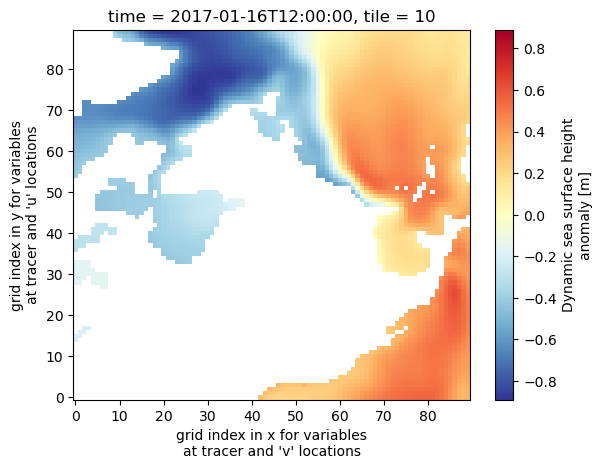

In [7]:
ds_SSH_s3.SSH.isel(time=0,tile=10).plot(cmap='RdYlBu_r')

We can also use the `ecco_v4_py` package to plot a global map of Jan 2017 SSH, using the `plot_proj_to_latlon_grid` function which regrids from the native LLC grid to a lat/lon grid.

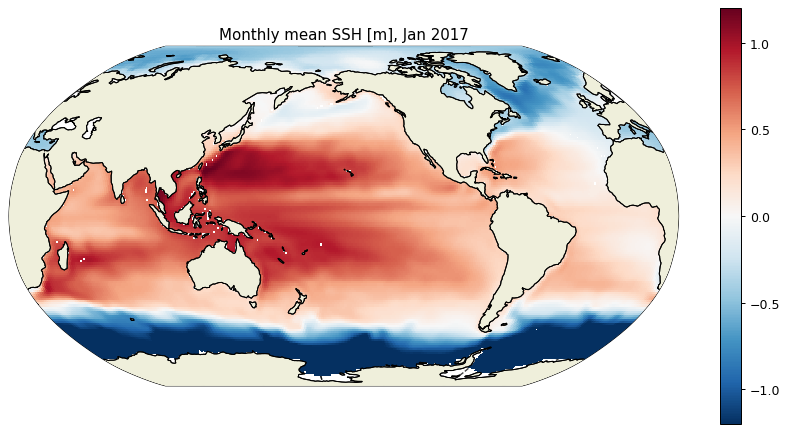

In [8]:
plt.figure(figsize=(12,6), dpi= 90)
ecco.plot_proj_to_latlon_grid(ds_SSH_s3.XC, ds_SSH_s3.YC, \
                              ds_SSH_s3.SSH.isel(time=0), \
                              user_lon_0=-160,\
                              projection_type='robin',\
                              plot_type='pcolormesh', \
                              cmap='RdBu_r',\
                              dx=1,dy=1,cmin=-1.2, cmax=1.2,show_colorbar=True)
plt.title('Monthly mean SSH [m], Jan 2017')
plt.show()

## Using the `ecco_podaac_access` function

### In-cloud direct access (mode = 's3_open')

The `ecco_podaac_to_xrdataset` function that was previously used invokes `ecco_podaac_access` under the hood, and `ecco_podaac_access` can also be called directly. This can be useful if you want to obtain a list of file objects/paths or URLs that you can then process with your own code. Let's use this function with mode = `s3_open` (all `S3` modes only work from an AWS Cloud environment in region `us-west-2`).

In [9]:
curr_shortname = 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4'
files_dict = ea.ecco_podaac_access(curr_shortname,\
                                    StartDate='2015-01',EndDate='2015-12',\
                                    mode='s3_open')

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2015-01-02,2015-12-31'}

Total number of matching granules: 12


In [10]:
files_dict[curr_shortname]

[<File-like object S3FileSystem, podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2015-01_ECCO_V4r4_native_llc0090.nc>,
 <File-like object S3FileSystem, podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2015-02_ECCO_V4r4_native_llc0090.nc>,
 <File-like object S3FileSystem, podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2015-03_ECCO_V4r4_native_llc0090.nc>,
 <File-like object S3FileSystem, podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2015-04_ECCO_V4r4_native_llc0090.nc>,
 <File-like object S3FileSystem, podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2015-05_ECCO_V4r4_native_llc0090.nc>,
 <File-like object S3FileSystem, podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2015-06_ECCO_V4r4_native_llc0090.nc>,
 <File-lik

The output of `ecco_podaac_access` is in the form of a dictionary with ShortNames as keys. In this case, the value associated with this ShortName is a list of 12 file objects. These are files on `S3` (AWS's cloud storage system) that have been opened, which is a necessary step for the files' data to be accessed. The list of open files can be passed directly to `xarray.open_mfdataset`.

In [11]:
ds_SSH_fromlist = xr.open_mfdataset(files_dict[curr_shortname],\
                                    compat='override',data_vars='minimal',coords='minimal',\
                                    parallel=True)